In [3]:
import plotly.express as px
import plotly.graph_objects as go

In [4]:
years = [2018, 2019, 2020, 2021, 2022]
sales = [100, 150, 200, 180, 220]
fig = go.Figure(data= go.Scatter(x = years, y= sales))
fig.show()

In [5]:
import pandas as pd  
import numpy as np 
import warnings 
warnings.filterwarnings('ignore')


In [14]:
path = 'D:/AI/ai_deploma_master/ai_deploma_master/code/files/train (2).csv'

In [15]:
df = pd.read_csv(path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:

# df.head()
df.drop(['PassengerId','Name','Ticket'], axis=1,inplace=True)

In [17]:
def chk_types(df):
    dtypes =df.dtypes
    n_unique = df.nunique()
    return pd.DataFrame({"Dtypes":dtypes,"Num_uniques":n_unique}).T

In [19]:
from process import chk_types
chk_types(df)

ModuleNotFoundError: No module named 'process'

In [24]:
cols = ['Survived','Pclass','Parch','Sex','Embarked','SibSp']


df[cols] = df[cols].astype('category')
chk_types(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Dtypes,category,category,category,float64,category,category,float64,category
Num_uniques,2,3,2,88,7,7,247,3


In [22]:
null = df.isnull().sum()
ratio = round( (null /df.shape[0])*100 ,2).astype(str) +"%"
pd.DataFrame({"Null_sum": null, "Ratio %": ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Null_sum,0,0,0,0,0,0,0,0
Ratio %,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%


In [21]:
df1 = df.dropna(subset=['Embarked'], inplace= True)
df2 = df.drop("Cabin", axis=1, inplace= True)


In [20]:
median =  df['Age'].median()
df['Age'].fillna(median, inplace= True)

In [26]:
null = df.isnull().sum()
ratio = round( (null /df.shape[0])*100 ,2).astype(str) +"%"
pd.DataFrame({"Null_sum": null, "Ratio %": ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Null_sum,0,0,0,0,0,0,0,0
Ratio %,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%


In [25]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Age', 'Fare'], dtype='object')

In [27]:
cat_cols = df.select_dtypes('category').columns
cat_cols

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [29]:
px.colors.qualitative.Pastel

['rgb(102, 197, 204)',
 'rgb(246, 207, 113)',
 'rgb(248, 156, 116)',
 'rgb(220, 176, 242)',
 'rgb(135, 197, 95)',
 'rgb(158, 185, 243)',
 'rgb(254, 136, 177)',
 'rgb(201, 219, 116)',
 'rgb(139, 224, 164)',
 'rgb(180, 151, 231)',
 'rgb(179, 179, 179)']

In [30]:

fig = px.pie(df,
             names='Survived',
             title = '<b>Survived Distribution</b>',
             color_discrete_sequence=px.colors.qualitative.Pastel,
             hole=0.4)
fig.show()

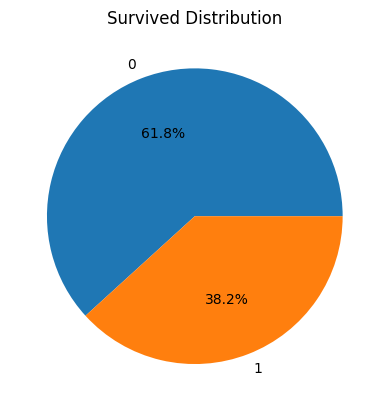

In [31]:
import matplotlib.pyplot as plt
counts = df['Survived'].value_counts()

plt.pie(
    counts.values,
    labels=counts.index,
    autopct='%1.1f%%'
)
plt.title('Survived Distribution')
plt.show()

In [32]:

fig = px.pie(df,
             names='Survived',
             title = '<b>Survived Distribution</b>',
             color_discrete_sequence=px.colors.qualitative.Pastel,
             hole=0.7)
fig.update_layout(annotations = [dict(text = 'Survived', font_size = 20, x = 0.5, y = 0.5, showarrow = False)])

In [33]:
px.histogram(df, 
             x = 'Survived',
             color='Sex',
             title='<b> Survived based on Gender</b>', 
             barmode='group')
fig.update_layout(width=700, height = 500, bargap = 0.2)
fig.show()

In [34]:
fig = px.histogram(df,x='Survived',color='Sex',title='<b> Survived base on Gender', barmode='group')#stacked
fig.update_layout(width= 400, height = 300, bargap = 0.2)
fig.show()

In [35]:
fig = px.box(df, y ="Age", points='all', title="Titanic Age box plot with outliers")
fig.show()
fig_1 = px.box(df, y ="Fare", points='all', title="Titanic Age box plot with outliers")
fig_1.show()

In [36]:
col = 'Age'

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
normal = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]
fig = go.Figure()
fig.add_trace(go.Scatter(y= normal[col], mode = 'markers', name='Normal'))
fig.add_trace(go.Scatter(y = outliers[col], mode = 'markers',
                         marker = dict(color= 'red', size = 10)))


In [37]:
cat_cols

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [38]:
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

# Create subplot layout: 2 rows × 3 columns
fig = sp.make_subplots(rows=2, cols=3, subplot_titles=cat_cols,
                       specs=[[{'type':'domain'}]*3, [{'type':'domain'}]*3])

for i, col in enumerate(cat_cols):
    row = i // 3 + 1
    col_pos = i % 3 + 1
    
    unique = df[col].value_counts()
    categories = unique.index
    count = unique.values
    
    fig.add_trace(
        go.Pie(labels = categories, values = count, name= col, hole = 0.4, textinfo = "percent + label"),
        row =row, col = col_pos
    )
fig.update_layout(height = 600, width = 1000)
fig.show()